# Facciamo qualcosa sugli autoencoder

In [3]:
from tensorflow import keras
from keras import layers

In [4]:
encoding_dim = 32 

#Encoding dim sarebbe il numero di neuroni del layer nascosto

image_dim = 784


input_img = keras.Input(shape=(image_dim,))


Nel mnist le immagini sono 28x28. Se facciamo i conti:

$$28 \times 28 = 784$$

Ecco per quale motivo si usa un autoencoder con 784 neuroni in input.


In [ ]:

#Ora, ci serve il layer encoded
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

#Ora, ci serve il layer decoded
decoded = layers.Dense(image_dim, activation=keras.activations.sigmoid)(encoded)

#Ora, creiamo il modello

#I parametri sono:
# - input_img: il layer di input
# - decoded: il layer di output
autoencoder = keras.Model(input_img, decoded)

In [5]:
#Facciamo un modello encoder
#Serve praticamente per fare la codifica

encoder = keras.Model(input_img, encoded)

In [6]:
encoded_input = keras.Input(shape=(encoding_dim,))
#Prendiamo l'ultimo layer dell'autoencoder perché è quello che ci interessa
#per fare la decodifica

decoder_layer = autoencoder.layers[-1]

#Creiamo il modello decoder
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Prendiamo un dataset su cui fare il training

In [7]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())

In [8]:
from keras.datasets import mnist
import numpy as np

In [9]:
(x_train, _) , (x_test, _) = mnist.load_data()
#Lasciamo il secondo parametro vuoto perché non ci interessa, che sarebbe il target

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
#Come al solito normalizziamo tra 0 e 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#astype('float32') serve per convertire i valori in float32

#Ora, dobbiamo fare il reshape dei dati che serve per farli diventare
#un vettore di 784 elementi

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

#Questa riga esattamente fa il reshape nel seguente modo:
# - len(x_train) è il numero di immagini
# - np.prod(x_train.shape[1:]) è il numero di elementi di ogni immagine
#   che è uguale a 28*28=784

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

### Training 

In [11]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,validation_data=(x_test, x_test))

#Usiamo 2 x_train all'inizio come i primi due parametri perché:
# - il primo è il training set
# - il secondo è il target, e negli autoencoder il target è uguale al training set


Epoch 1/50
235/235 [==============================] - 4s 6ms/step - loss: 0.0697 - val_loss: 0.0397
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0342 - val_loss: 0.0290
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0261 - val_loss: 0.0229
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0213 - val_loss: 0.0190
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0180 - val_loss: 0.0164
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0158 - val_loss: 0.0146
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0142 - val_loss: 0.0132
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.0116
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0117 - val_loss: 0.0111

In [12]:
#Vediamo qualche codifica e decodifica

immagini_codificate = encoder.predict(x_test)
immagini_decodificate = decoder.predict(immagini_codificate)


313/313 [==============================] - 0s 1ms/step


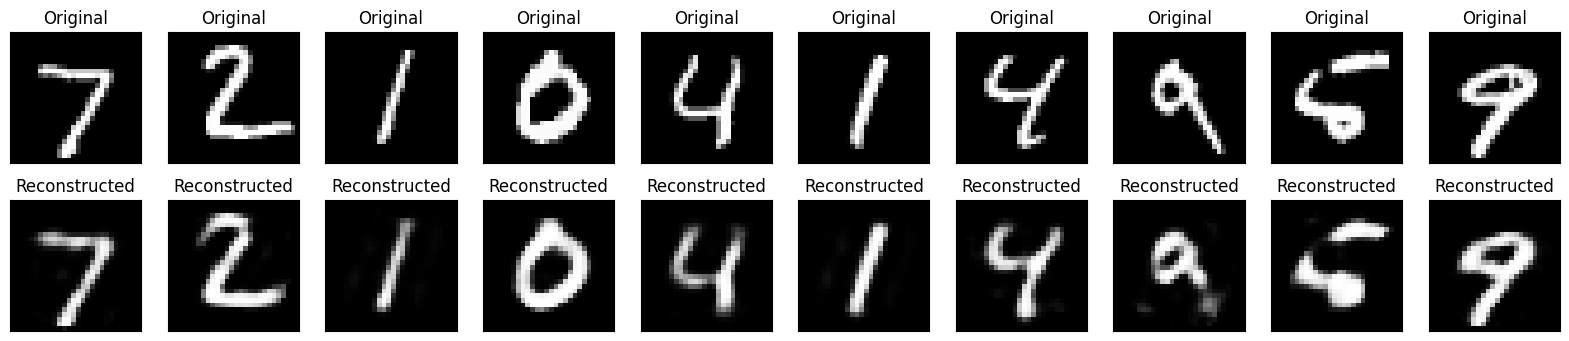

In [17]:
# Plot using seaborn

import matplotlib.pyplot as plt
import seaborn as sns

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(immagini_decodificate[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

TypeError: Image data of dtype object cannot be converted to float

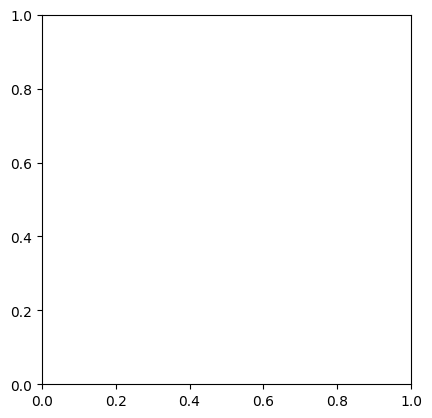

In [110]:
#Voglio provare a passare io un immagine ora.

#usiamo la libreria openCV

import cv2

img = cv2.imread('sette.png', cv2.IMREAD_GRAYSCALE)

#Ora devo fare il resize perché, giustamente, il formato deve essere uguale
#al formato del training set

#Mostriamo l'immagie prima di fare il resize
plt.imshow(img, cmap='gray')
plt.show()


img = cv2.resize(img, (28, 28))
plt.imshow(img, cmap='gray')
plt.show()

#Ora, devo fare il reshape perché, giustamente, il formato deve essere uguale
#al formato del training set

img = img.reshape((1, np.prod(img.shape)))

#Ora, devo fare la normalizzazione perché, giustamente, il formato deve essere uguale
#al formato del training set

img = img.astype('float32') / 255.



In [67]:
#Si fa ora il guessingssss

img_codificata = encoder.predict(img)
img_decodificata = decoder.predict(img_codificata)

1/1 [==============================] - 0s 26ms/step


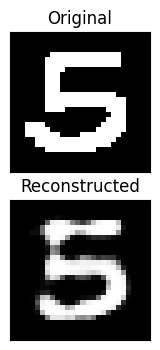

In [68]:

plt.figure(figsize=(20, 4))

# Original image
ax = plt.subplot(2, 1, 1)
plt.imshow(img.reshape(28, 28))
plt.title("Original")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Reconstructed image
ax = plt.subplot(2, 1, 2)
plt.imshow(img_decodificata.reshape(28, 28))
plt.title("Reconstructed")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()


# Onestamente fa cacare

Proviamo ad aggiungere dei vincoli di sparsità

In [69]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(image_dim,))
#Aggiungiamo un layer dense con un regularizer

encoded = layers.Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
ancoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation=keras.activations.sigmoid)(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(image_dim, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

Alleniamo per 100 epoche ora.

In [70]:
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True,validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0755 - val_loss: 0.0598
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0543 - val_loss: 0.0461
Epoch 3/100
  1/235 [..............................] - ETA: 1s - loss: 0.0460

KeyboardInterrupt: 

In [71]:
# Vediamo come va ora

immagini_codificate = encoder.predict(x_test)
immagini_decodificate = decoder.predict(immagini_codificate)


313/313 [==============================] - 0s 1ms/step


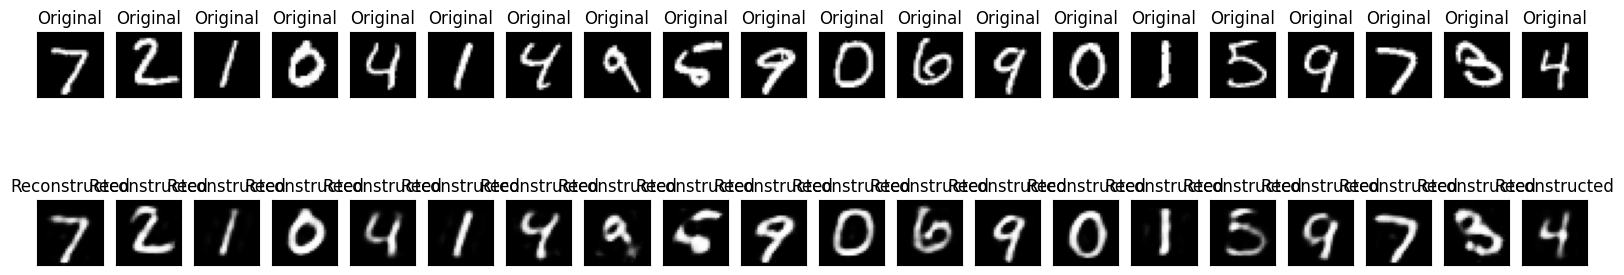

In [72]:

n = 20
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(immagini_decodificate[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

1/1 [==============================] - 0s 26ms/step


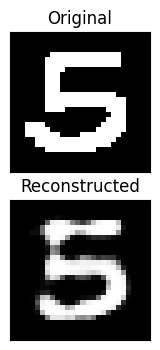

In [73]:
#Ma vediamo ora con la mia immagine

img_codificata = encoder.predict(img)
img_decodificata = decoder.predict(img_codificata)


plt.figure(figsize=(20, 4))

# Original image
ax = plt.subplot(2, 1, 1)
plt.imshow(img.reshape(28, 28))
plt.title("Original")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Reconstructed image
ax = plt.subplot(2, 1, 2)
plt.imshow(img_decodificata.reshape(28, 28))
plt.title("Reconstructed")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

### A ME SEMBRA UGUALE.


# Proviamo con CNN

In [94]:
input_img = keras.Input(shape=(28,28,1))


x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
#16 è il numero di filtri. (3,3) è la grandeza del filtro.
#padding same significa che il padding viene applicato per avere la stessa dimensione dell'input

x = layers.MaxPooling2D((2,2), padding='same')(x)
#Il pooling diminuisce la grandezza dell'immagine e tiene quelle più importanti
#Prende il max valore in un kernel 2x2

x = layers.Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = layers.MaxPool2D((2,2), padding='same')(x)

x = layers.Conv2D(8,(3,3), activation='relu', padding='same')(x)

#Ultimo layer per questa prima parte e fare l'encoder
#Ripetiamo questa cosa con le CNN per estrarre le cose più importanti e diminuire la dimensionalità e il rischio di overfitting

encoded = layers.MaxPooling2D((2,2), padding='same')(x)
#Questo invece rappresenta l'output dell'encoder

#Faccimao la parte del decoder ora

x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)

x = layers.Conv2D(16, (3,3), activation='relu')(x)
x = layers.UpSampling2D((2,2))(x)

# j

decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)


In [95]:
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy)

In [96]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 

x_train = np.reshape(x_train, (len(x_train), 28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28,28,1))

In [97]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [111]:
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 8)           584

Alleniamo

In [98]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Epoch 1/50
469/469 [==============================] - 51s 9ms/step - loss: 0.2155 - val_loss: 0.1480
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1361 - val_loss: 0.1263
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1226 - val_loss: 0.1178
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1166 - val_loss: 0.1131
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1126 - val_loss: 0.1101
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1095 - val_loss: 0.1079
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1072 - val_loss: 0.1050
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1053 - val_loss: 0.1034
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1039 - val_loss: 0.1019
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1026 - val_loss: 0.100

In [102]:
# Vediamo come va ora

immagini_codificate = autoencoder.predict(x_test)


313/313 [==============================] - 1s 3ms/step


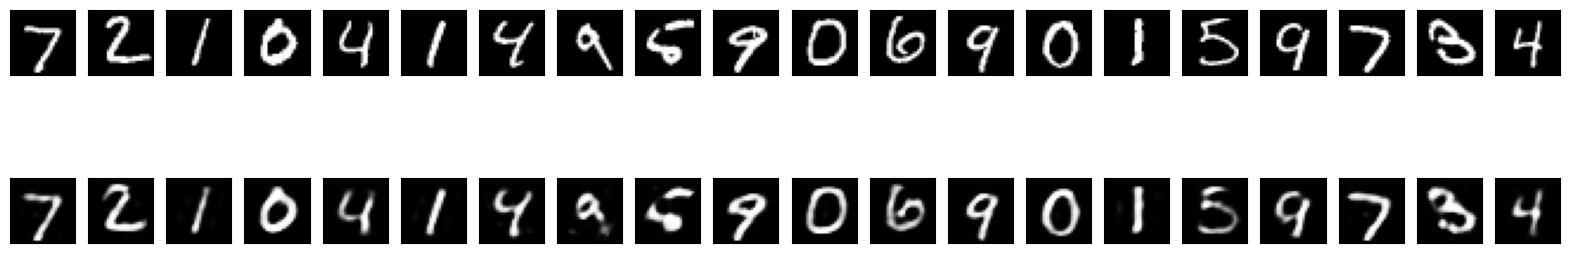

In [112]:
#Let's test the images


n = 20
plt.figure(figsize=(20, 4))

for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(immagini_decodificate[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

1/1 [==============================] - 0s 353ms/step


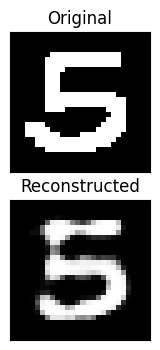

In [106]:
#Ma vediamo ora con la mia immagine

img_reshaped = img.reshape(1, 28, 28, 1)
img_codificata = autoencoder.predict(img_reshaped)

plt.figure(figsize=(20, 4))

# Original image
ax = plt.subplot(2, 1, 1)
plt.imshow(img.reshape(28, 28))
plt.title("Original")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Reconstructed image
ax = plt.subplot(2, 1, 2)
plt.imshow(img_decodificata.reshape(28, 28))
plt.title("Reconstructed")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

Ora mi faccio 10 cifre diverse, vediamo come va!

In [107]:
import os
import cv2
import numpy as np

# Path to the folder containing the images
folder_path = "mymnist"

# List to store the images
images = []

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    # Read the image using OpenCV
    img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to the desired shape
    img = cv2.resize(img, (28, 28))
    
    # Normalize the image
    img = img.astype('float32') / 255.
    
    # Reshape the image to match the input shape of the model
    img = img.reshape((1, 28, 28, 1))
    
    # Append the image to the list
    images.append(img)

# Convert the list of images to a numpy array
images = np.concatenate(images, axis=0)

# Print the shape of the images array
print("Shape of the images array:", images.shape)


Shape of the images array: (12, 28, 28, 1)


In [108]:
# Facciamo ora il predict

mymnist = autoencoder.predict(images)

1/1 [==============================] - 0s 301ms/step


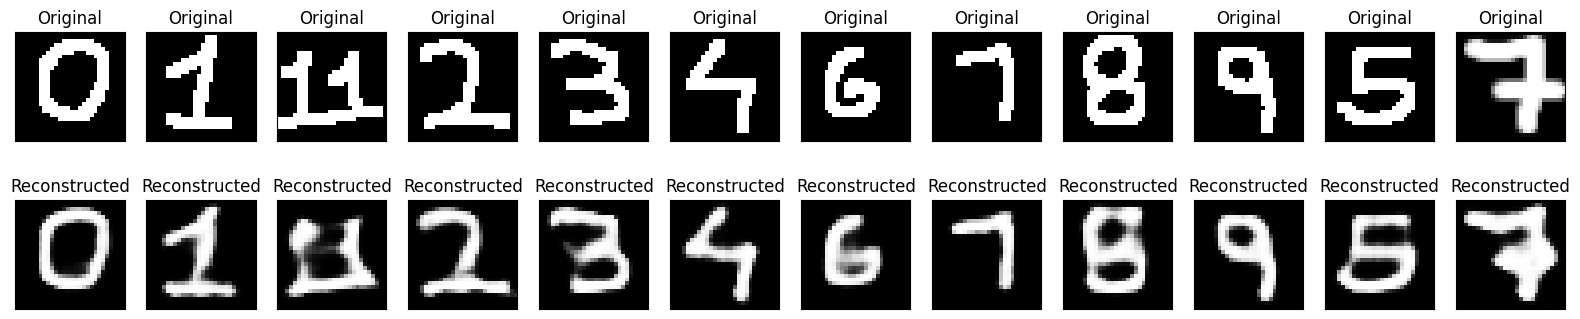

In [109]:
import matplotlib.pyplot as plt

# Define the number of images to plot
num_images = mymnist.shape[0]

# Set the figure size
plt.figure(figsize=(20, 4))

# Loop through the images and plot them
for i in range(num_images):
    # Create a subplot for each image
    ax = plt.subplot(2, num_images, i + 1)
    
    # Plot the original image
    plt.imshow(images[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Create a subplot for the reconstructed image
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    
    # Plot the reconstructed image
    plt.imshow(mymnist[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the plot
plt.show()


### Problemi principali 


1. **Rappresentazione codificata densa**: Gli autoencoder tradizionali apprendono una rappresentazione codificata densa dei dati, il che significa che tutti i nodi nel layer codificato sono generalmente utilizzati per rappresentare l'input. Questo può rendere difficile l'interpretazione della rappresentazione codificata.

2. **Limiti nella generazione di nuovi dati**: Gli autoencoder non sono progettati per generare nuovi dati che seguono la stessa distribuzione dei dati di addestramento. Questo è dovuto al fatto che la rappresentazione codificata non è necessariamente una distribuzione continua, il che rende difficile campionare nuovi punti.

3. **Overfitting**: Gli autoencoder possono soffrire di overfitting, specialmente quando la dimensione della rappresentazione codificata è relativamente grande. Questo può portare a una scarsa generalizzazione su nuovi dati.

I Variational Autoencoders (VAE) sono una variante degli autoencoder che cerca di affrontare alcuni di questi problemi. I VAE apprendono una distribuzione probabilistica dei dati, il che significa che possono generare nuovi dati che seguono la stessa distribuzione dei dati di addestramento. Inoltre, i VAE apprendono una rappresentazione codificata più sparsa dei dati, il che può facilitare l'interpretazione della rappresentazione codificata.

Tuttavia, i VAE hanno anche i loro limiti. Ad esempio, tendono a generare dati più sfocati rispetto ad altre tecniche di generazione di dati, come le Generative Adversarial Networks (GAN).
